In [1]:
##Importing the libraries

import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

##Open the dataset

df = pd.read_csv("./Group-project-DataScience-GroupD.csv", sep=";") #Passing the path and the right separator

df #Displaying the dataset to ensure proper opening

##First, we are going to print the dimensions of our dataset

print(f"The number of row of the dataset is: {df.shape[0]}") 
print(f"The number of columns of the dataset is: {df.shape[1]}")

print("The number of rows and columns of the dataset is coherent with our excel, highlighting proper opening and reading of the file")



The number of row of the dataset is: 1345
The number of columns of the dataset is: 9
The number of rows and columns of the dataset is coherent with our excel, highlighting proper opening and reading of the file


In [2]:
##After opening the dataset, we are going to do a check on the variable type

print("The types of the variables are:\n")

print(df.info())

The types of the variables are:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Date                                1345 non-null   object
 1   M2 Money Supply (Bn)                1345 non-null   object
 2   S&P 500 Index                       1345 non-null   object
 3   US Dollar Index                     1345 non-null   object
 4   Federal Funds Effective Rate (DFF)  1345 non-null   object
 5   Gold Futures                        1345 non-null   object
 6   Crude Oil Futures                   1345 non-null   object
 7   BTC/USD Index                       795 non-null    object
 8   CBOE Volatility Index (VIX)         1345 non-null   object
dtypes: object(9)
memory usage: 94.7+ KB
None


In [3]:
## After displaying the variables type, we realised that they were all read as objects by python. When variables are read as string, it will be more
## complicated to do mathematical operations on them. In order to overcome this issue, all variables were transformed as float and the date was
## transformed as a datetime type.
## Moreover, to better execute operations, we did the following modification:
## - Elimination of '$'
## - Elimination of '%'
## - Replacement of the comma (used as decimal separator) with a period

In [4]:
colswithdoll = ['M2 Money Supply (Bn)', 'S&P 500 Index', 'US Dollar Index', 'Gold Futures',
             'Crude Oil Futures', 'BTC/USD Index', 'CBOE Volatility Index (VIX)']
colwithper = ['Federal Funds Effective Rate (DFF)']

df[colswithdoll] = df[colswithdoll].apply(lambda x: x.str.replace('$', '', regex=False)
    .str.replace('.', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
)

df[colwithper] = df[colwithper].apply(lambda s: s.str.replace('%', '', regex=False)
    .str.replace(',', '.', regex=False)
    .astype(float)
    / 100
)

df['Date'] = pd.to_datetime(df['Date'], format='%d.%m.%Y')

In [5]:
## Let's try to print the new type:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1345 entries, 0 to 1344
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                1345 non-null   datetime64[ns]
 1   M2 Money Supply (Bn)                1345 non-null   float64       
 2   S&P 500 Index                       1345 non-null   float64       
 3   US Dollar Index                     1345 non-null   float64       
 4   Federal Funds Effective Rate (DFF)  1345 non-null   float64       
 5   Gold Futures                        1345 non-null   float64       
 6   Crude Oil Futures                   1345 non-null   float64       
 7   BTC/USD Index                       795 non-null    float64       
 8   CBOE Volatility Index (VIX)         1345 non-null   float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 94.7 KB
None


In [6]:
## Let's try to see if all the modifications have been done

display(df.head())

,Date,M2 Money Supply (Bn),S&P 500 Index,US Dollar Index,Federal Funds Effective Rate (DFF),Gold Futures,Crude Oil Futures,BTC/USD Index,CBOE Volatility Index (VIX)
0,2025-10-05,22243.7,6552.51,98.98,0.0409,4000.4,58.90,110671.5,21.66
1,2025-09-28,22092.7,6715.79,97.72,0.0409,3908.9,60.88,122387.1,16.65
2,2025-09-21,22082.5,6643.70,98.15,0.0419,3793.9,65.14,109652.8,15.29
3,2025-09-14,22197.4,6664.36,97.64,0.0433,3692.4,62.68,115699.2,15.45
4,2025-09-07,22159.7,6584.29,97.55,0.0433,3673.3,62.69,115924.9,14.76


In [7]:
## All the data has been correctly modified

In [8]:
#Let's do some cleaning now

df.isna().sum().sort_values(ascending = False)

BTC/USD Index                         550
Date                                    0
M2 Money Supply (Bn)                    0
US Dollar Index                         0
S&P 500 Index                           0
Federal Funds Effective Rate (DFF)      0
Gold Futures                            0
Crude Oil Futures                       0
CBOE Volatility Index (VIX)             0
dtype: int64

In [144]:
## We can see that our dataset contains 550 missing values for the "BTC/USD Index". This is an issue that we were totally
## expecting, as bitcoin has been created after the beginning date of our dataset.

In [11]:
## Let's do some EDA

## Let's first import the libraries

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
num_cols =  ["M2 Money Supply (Bn)", "S&P 500 Index", "US Dollar Index", "Gold Futures",
             "Crude Oil Futures", "BTC/USD Index", "CBOE Volatility Index (VIX)", "Federal Funds Effective Rate (DFF)"]

desc_stats1 = df[num_cols].describe().T
desc_stats1

,count,mean,std,min,25%,50%,75%,max
M2 Money Supply (Bn),1345.0,11674.802379,5534.457352,4636.2000,6863.6000,10355.4000,14593.3000,22243.7000
S&P 500 Index,1345.0,2232.170550,1401.257588,683.4000,1211.9000,1518.2000,2871.7000,6715.7900
US Dollar Index,1345.0,92.815033,11.311502,71.6600,82.6000,93.1400,100.3800,119.9000
Gold Futures,1345.0,1205.863792,692.457336,258.4000,604.2000,1234.6000,1656.6000,4000.4000
Crude Oil Futures,1345.0,63.817219,25.013894,16.9400,44.6800,63.0800,81.2500,145.2900
BTC/USD Index,795.0,18544.783270,28195.354850,0.1000,253.5000,5051.8000,26938.4000,122387.1000
CBOE Volatility Index (VIX),1345.0,19.688788,8.437739,9.1400,13.8000,17.5200,23.1200,79.1300
Federal Funds Effective Rate (DFF),1345.0,0.019920,0.020330,0.0005,0.0014,0.0125,0.0398,0.0672


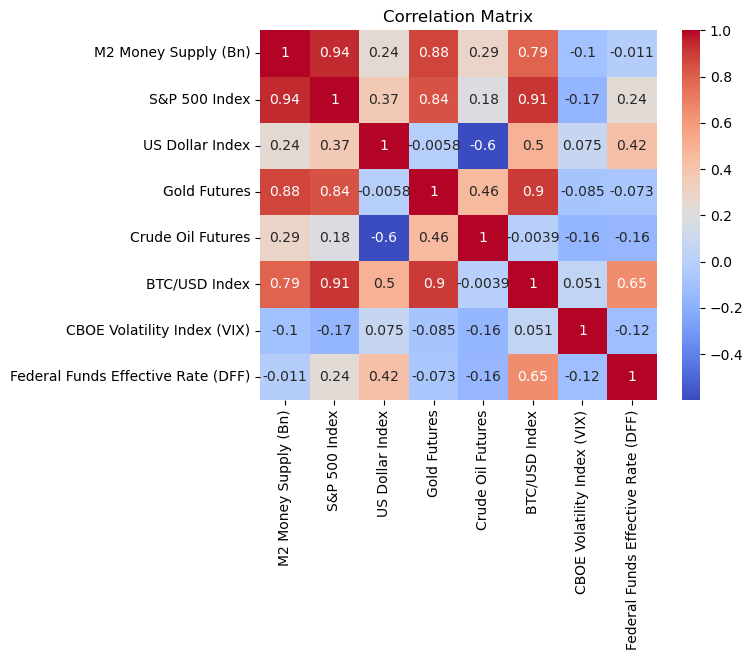

In [39]:
## Firstly, we are going to give a look at the correlation matrix to see if there is some correlation between the variables of our dataset
num_cols =  ["M2 Money Supply (Bn)", "S&P 500 Index", "US Dollar Index", "Gold Futures",
             "Crude Oil Futures", "BTC/USD Index", "CBOE Volatility Index (VIX)", "Federal Funds Effective Rate (DFF)"]

sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [13]:
## We printed the correlation matrix for the absolute values of our dataset. In our dataset we have mainly time series, and this may lead to some 
##problem of spurious correlation. In order to overcome this issue, and also beacasue when comparing
## different assets it makes more sense, we are going to convert all our values in % changes

In [20]:
time_col = 'Date'

df_temp = df.sort_values(by=time_col, ascending=True).copy() ## We do a temporary dataset where we sort the date from the oldest to the newest

## This is a necessary step beacause of how the pct_change works in python. In fact, to compute the % change this is the formula: 
## p(t) - p(t-1) / p(t-1). In python this means (current row - previous row) / (previous row). The problem with our dataset is that
## we have the dates in descending order so we invert the calculation
## EX : if we keep our original dataset we would  have for example that for row1 we would do (2025-09-28)-(2025-10-05) / (2025-10-05), which is a 
## mistake. That's why the first step is to invert our dataset.

df_returns = df_temp[num_cols].pct_change() * 100 ## We compute the percentage changes

df_returns.insert(0, time_col, df_temp[time_col].values) ## Add the "date" columns to the new dataset

df_returns_final = df_returns.sort_values(by=time_col, ascending=False).reset_index(drop=True) ## We put back the original order

df_returns_final


df_returns_final.to_csv("./Group-project-Data_Percent_Changes.csv", index=False)


In [36]:
desc_stats2 = df_returns_final[num_cols].describe().T
desc_stats2

,count,mean,std,min,25%,50%,75%,max
M2 Money Supply (Bn),1344.0,0.117255,0.549488,-2.538433,-0.214530,0.119213,0.459232,3.049620
S&P 500 Index,1344.0,0.143512,2.469147,-18.195051,-1.046203,0.256002,1.448464,12.101742
US Dollar Index,1344.0,0.004452,1.078643,-4.337677,-0.712351,0.020897,0.661096,4.890183
Gold Futures,1344.0,0.225319,2.367716,-9.637957,-1.058832,0.295772,1.630288,13.106606
Crude Oil Futures,1344.0,0.209070,5.314457,-29.309801,-2.651299,0.483715,3.162638,31.752673
BTC/USD Index,794.0,2.854917,16.324598,-51.111111,-3.891985,0.756828,6.816655,127.710843
CBOE Volatility Index (VIX),1344.0,1.043730,15.406864,-42.663043,-7.735426,-0.951250,7.190578,134.836066
Federal Funds Effective Rate (DFF),1344.0,0.542801,10.785431,-81.818182,-0.524315,0.000000,0.778011,175.000000


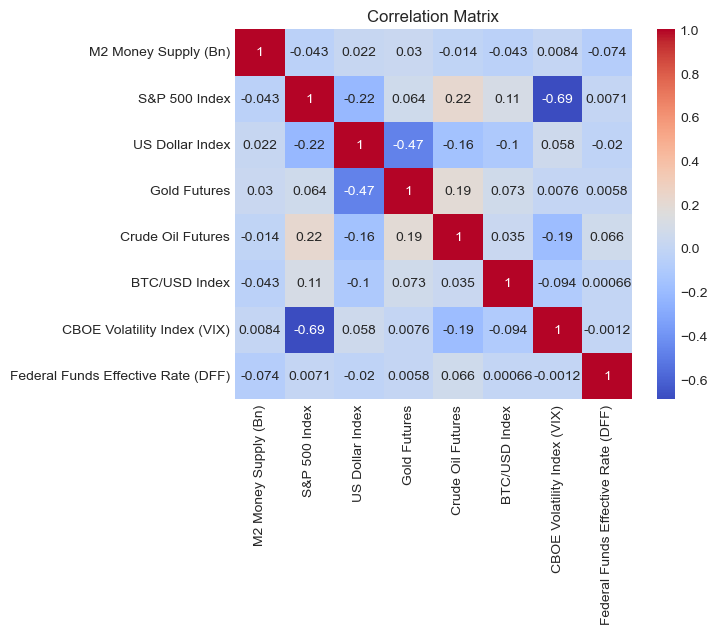

In [149]:
sns.heatmap(df_returns_final[num_cols].corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


Combined Visualization: Box Plot Absolute Levels vs. Box Plot Percentage Returns


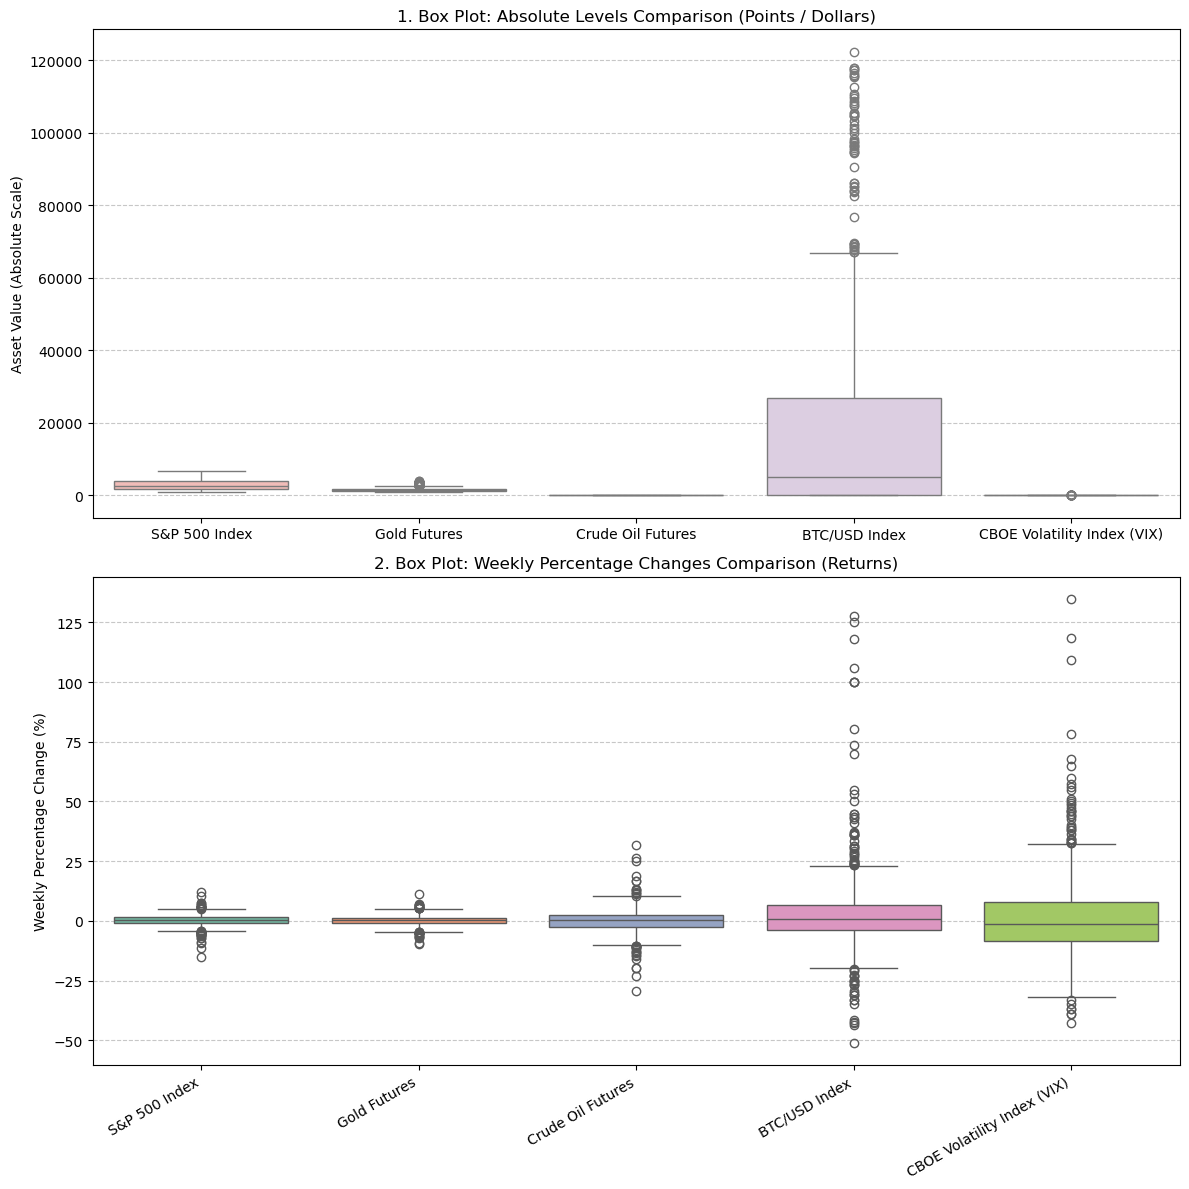

In [41]:
plt.figure(figsize=(12, 12)) 

cols_to_compare = ["S&P 500 Index", "Gold Futures", "Crude Oil Futures", 
                   "BTC/USD Index", "CBOE Volatility Index (VIX)"]


plt.subplot(2, 1, 1) 

sns.boxplot(data=df[cols_to_compare].dropna(), 
            palette="Pastel1") 

plt.title('1. Box Plot: Absolute Levels Comparison (Points / Dollars)')
plt.ylabel('Asset Value (Absolute Scale)')
plt.xticks(ticks=range(len(cols_to_compare)), 
           labels=cols_to_compare)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.subplot(2, 1, 2) 


sns.boxplot(data=df_returns_final[cols_to_compare].dropna(), 
            palette="Set2")


plt.title('2. Box Plot: Weekly Percentage Changes Comparison (Returns)')
plt.ylabel('Weekly Percentage Change (%)')
plt.xticks(ticks=range(len(cols_to_compare)), 
           labels=cols_to_compare, 
           rotation=30, 
           ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show() #

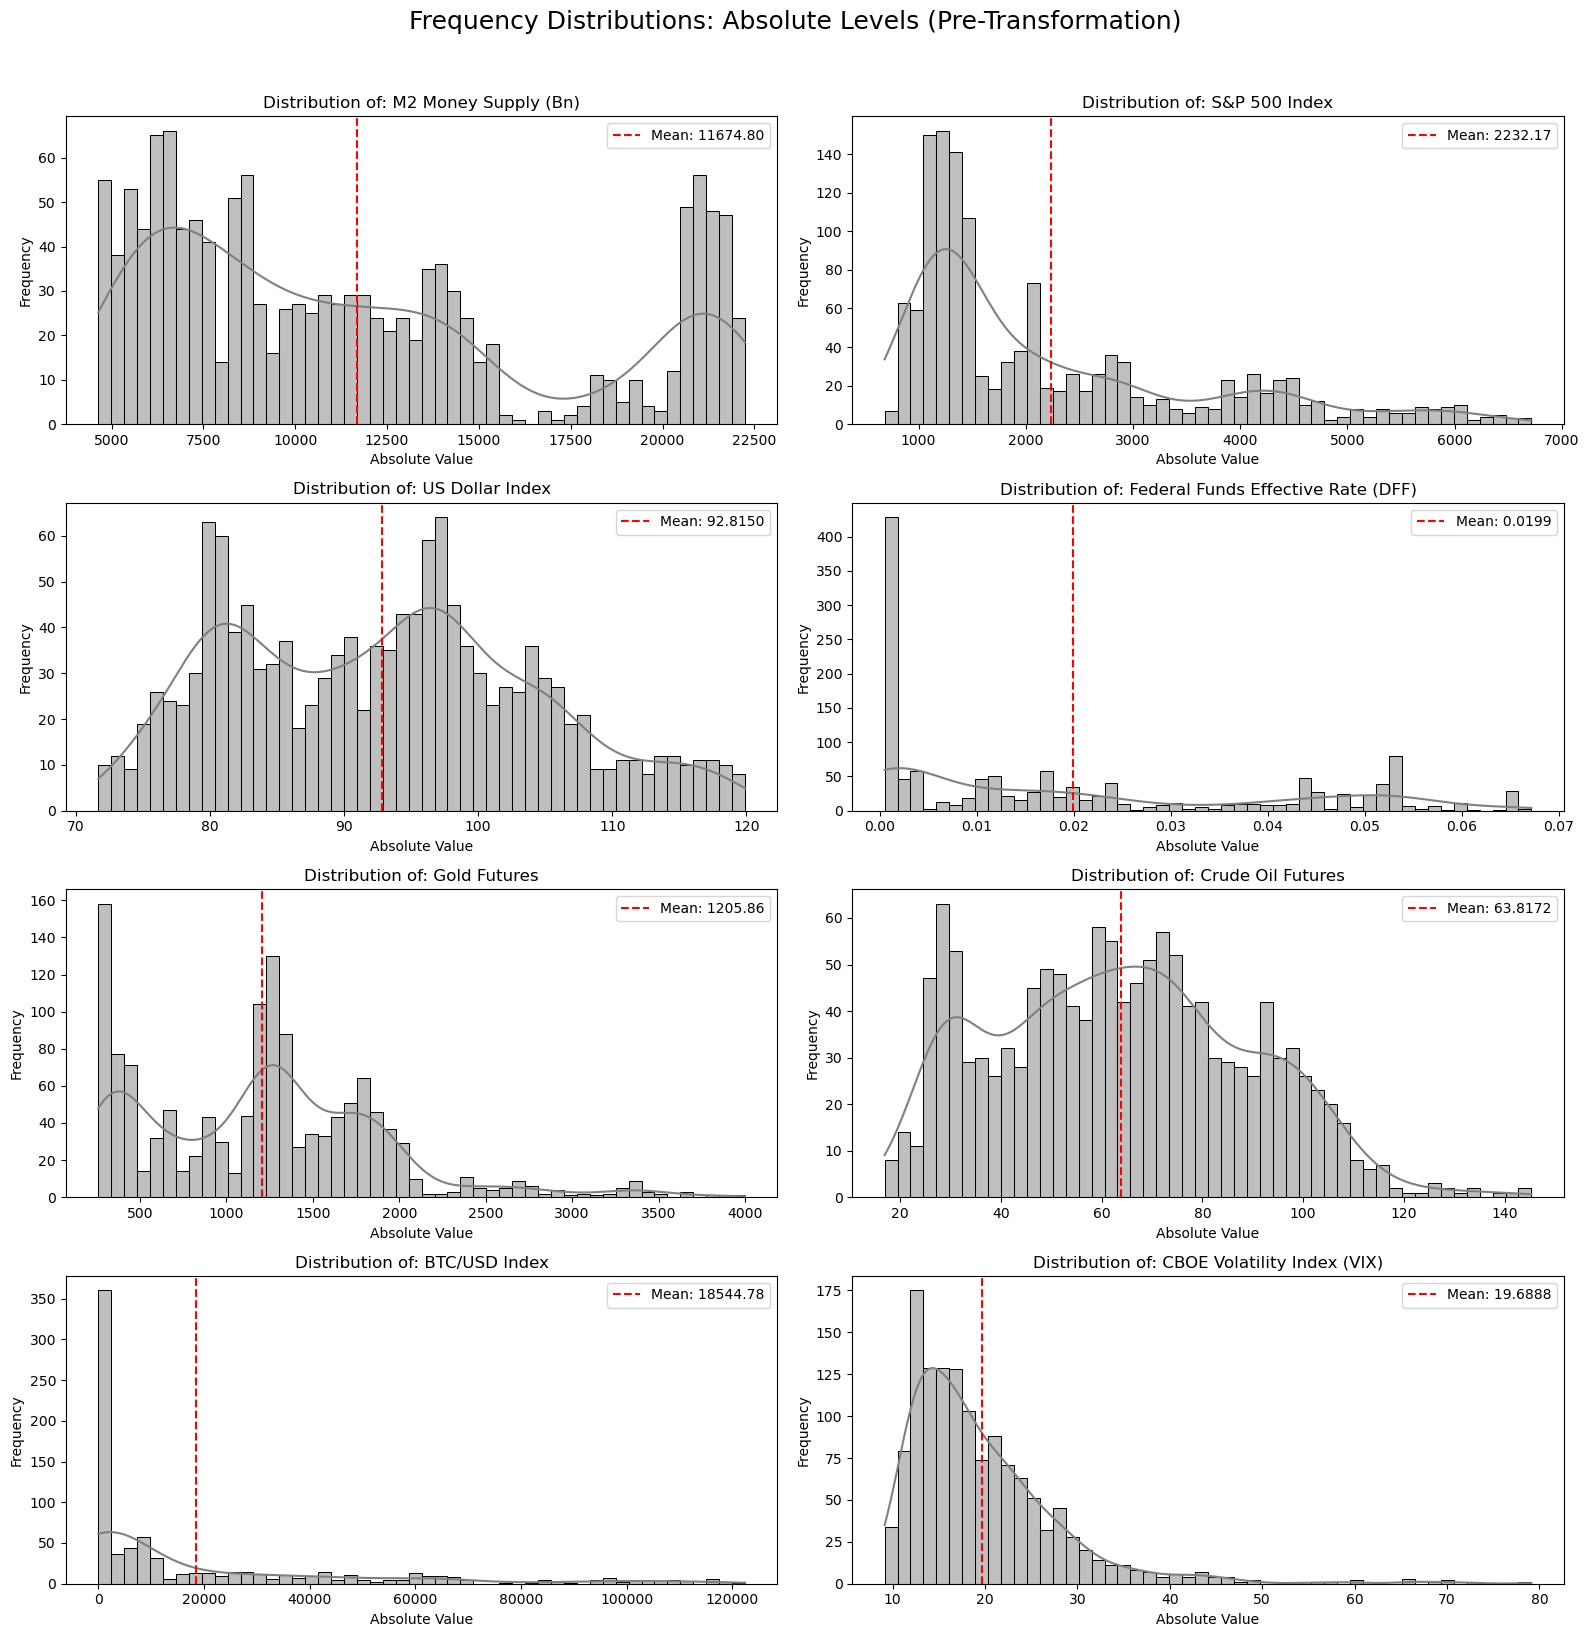

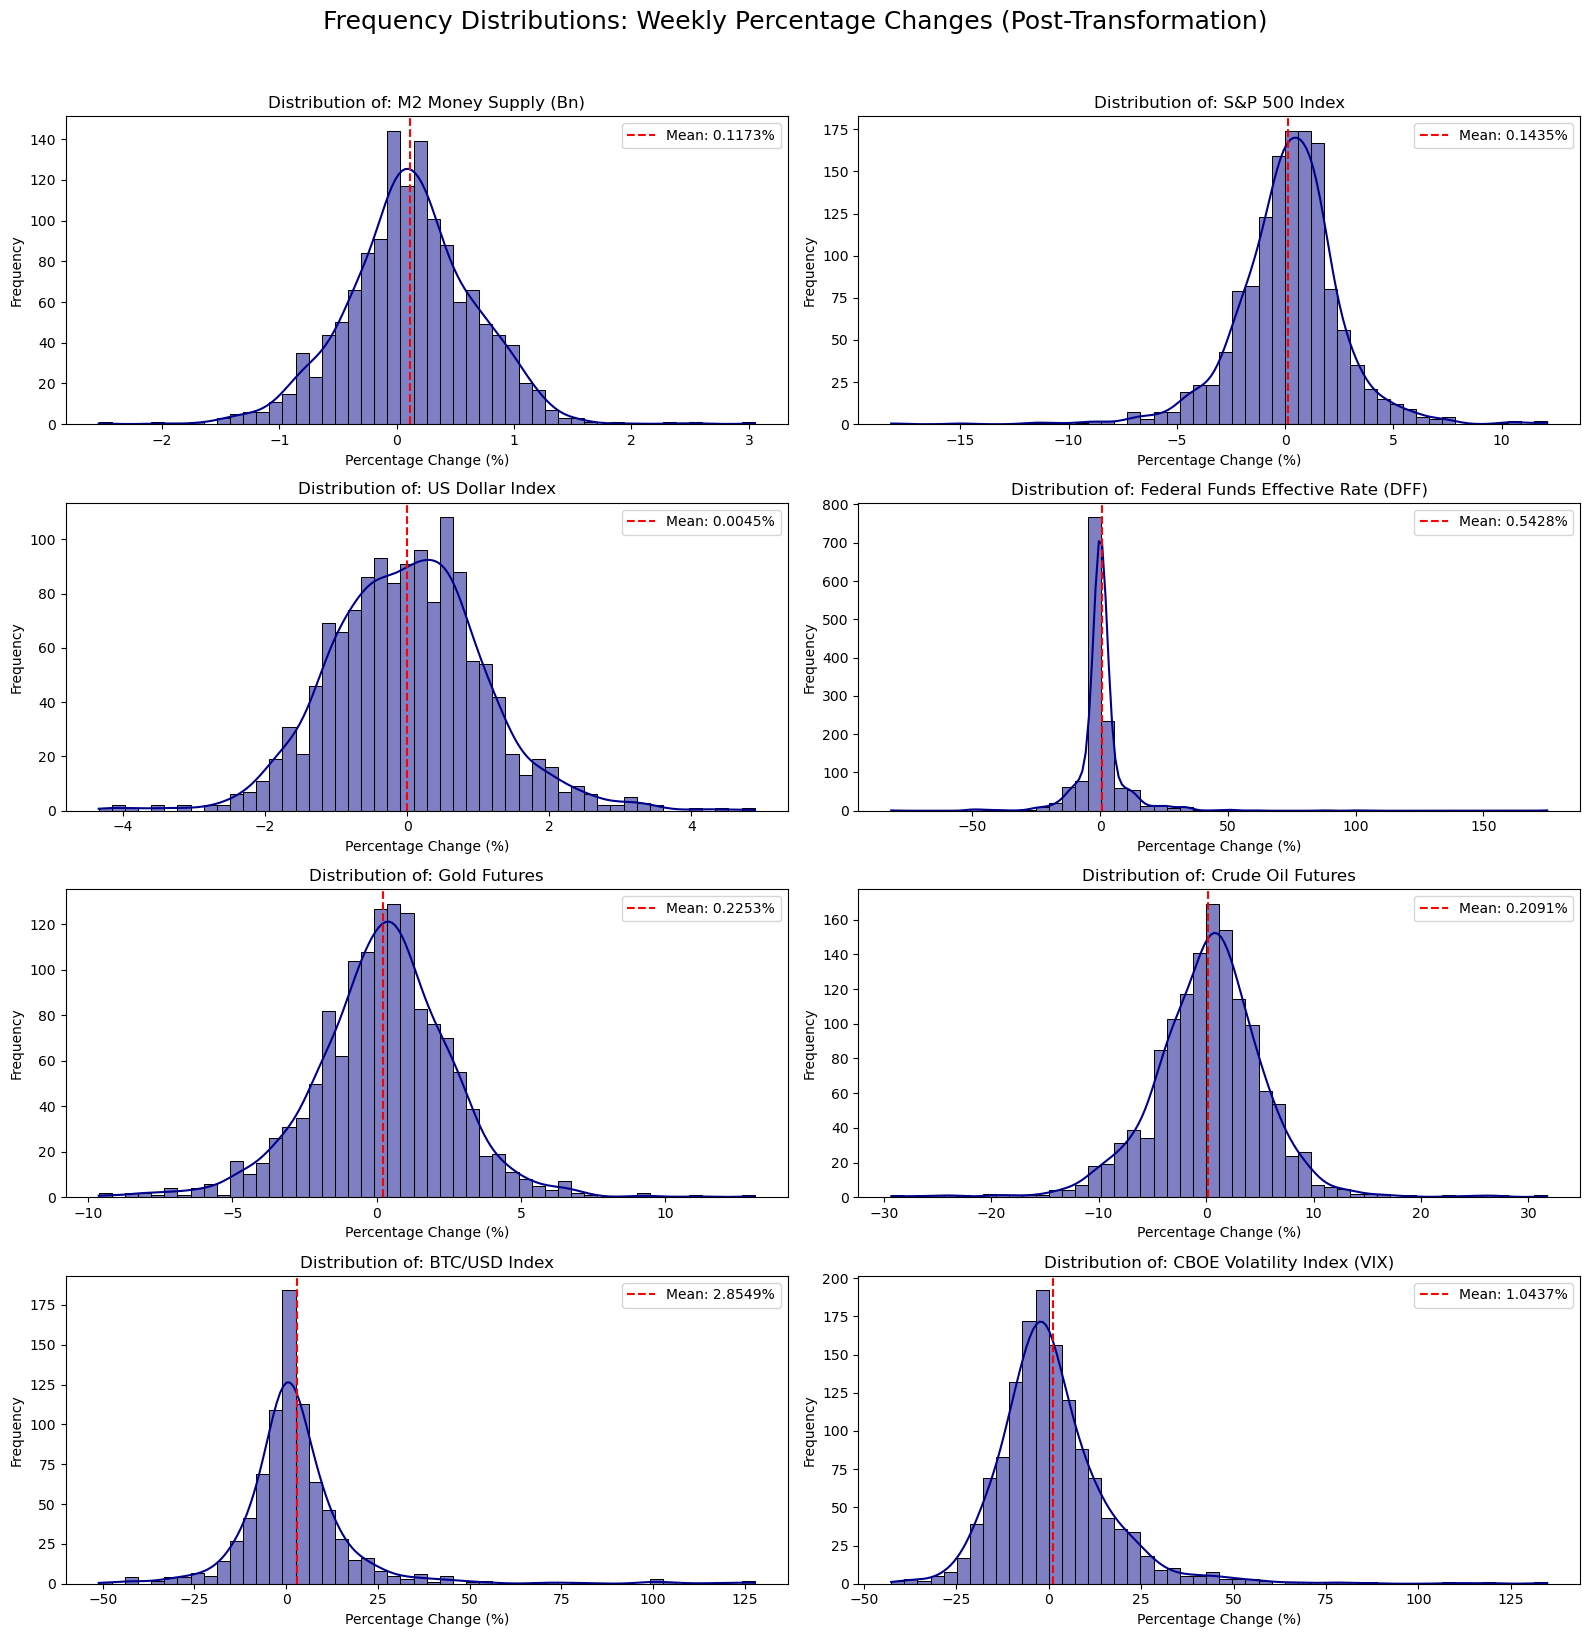

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["M2 Money Supply (Bn)", "S&P 500 Index", "US Dollar Index", 
            "Federal Funds Effective Rate (DFF)", "Gold Futures", 
            "Crude Oil Futures", "BTC/USD Index", "CBOE Volatility Index (VIX)"]

plt.figure(figsize=(16, 16)) 
plt.suptitle('Frequency Distributions: Absolute Levels (Pre-Transformation)', fontsize=18, y=1.02)

for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i + 1)
    
  
    sns.histplot(df[col].dropna(), 
                 bins=50, 
                 kde=True, 
                 color='gray') 
    
    mean_val = df[col].mean()
    label_val = f'Mean: {mean_val:.2f}' if mean_val > 100 else f'Mean: {mean_val:.4f}'
    
    plt.axvline(mean_val, 
                color='red', 
                linestyle='dashed', 
                linewidth=1.5, 
                label=label_val)

    plt.title(f'Distribution of: {col}', fontsize=12)
    plt.xlabel('Absolute Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout() 
plt.show() 

plt.figure(figsize=(16, 16)) 
plt.suptitle('Frequency Distributions: Weekly Percentage Changes (Post-Transformation)', fontsize=18, y=1.02)

for i, col in enumerate(num_cols):
    plt.subplot(4, 2, i + 1) 
 
    sns.histplot(df_returns_final[col].dropna(), 
                 bins=50, 
                 kde=True, 
                 color='darkblue') 
    
   
    mean_val = df_returns_final[col].mean()
    plt.axvline(mean_val, 
                color='red', 
                linestyle='dashed', 
                linewidth=1.5, 
                label=f'Mean: {mean_val:.4f}%')

    plt.title(f'Distribution of: {col}', fontsize=12)
    plt.xlabel('Percentage Change (%)')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout() 
plt.show() 